# Statistics for Machine Learning

This notebook contains select concepts regarding statistics for Machine Learning.

Credits to Machine Learning Mastery books.

### Overview

1. Foundation - Law of Large Numbers
2. Foundation - Central Limit Theorem
3. Hypothesis Testing - Statistical Hypothesis Testing
4. Hypothesis Testing - Statistical Distributions
5. Hypothesis Testing - Critical Values
6. Hypothesis Testing - Covariance and Correlation
7. Hypothesis Testing - Significance Tests
8. Hypothesis Testing - Effect Size
9. Hypothesis Testing - Statistical Power
10. Resampling Methods - Estimation with Cross-Validation
11. Estimation Statistics - Introduction to Estimation Statistics
12. Estimation Statistics - Tolerance Intervals
13. Estimation Statistics - Confidence Intervals
14. Estimation Statistics - Prediction Intervals
15. Nonparametric Methods - Normality Tests
16. Nonparametric Methods - 5 number summary
17. Nonparametric Methods - Independence Test


### 1) Foundation - Law of Large Numbers

Overview:
- We have an intuition that more observations are better. The law of large numbers is a theorem from probability and statistics that suggests that the average result from repeating an experiment multiple times will better approximate the true or expected underlying result. 

Key points:
- As the size of the sample increases, the mean value of the sample will better approximate the mean or expected value of the population. As the sample size goes to infinity, the sample mean will converge to the population mean.
- Regression to the Mean - As we increase sample size, the mean of the sample will move back toward the population mean/ the true udnerlying expected value. We must be skeptical of inferences from small sample sizes.

We can make a line plot of an example idealized Gaussian distribution (our familiar 'bell-curve')

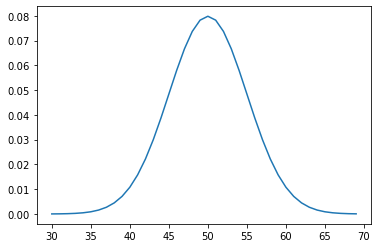

In [3]:
# Idealized population distribution
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm

# x-axis for the plot
xaxis = arange(30, 70, 1)
# y-axis for the plot
yaxis = norm.pdf(xaxis, 50, 5)

# plot ideal population
pyplot.plot(xaxis, yaxis)
pyplot.show()

We create an example that calculates samples of different sizes, estimating the mean and plotting the error in the mean from the expected mean. Generally, we expect to see that larger sample sizes have less error (whether or not the error is an over or underestimate of the mean is irrelevant).

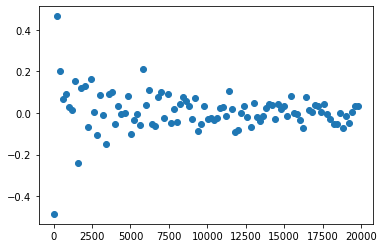

In [5]:
# demonstrate the law of large numbers
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import array
from matplotlib import pyplot

# seed the random number generator
seed(1)
# sample sizes
sizes = list()
for x in range (10, 20000, 200):
    sizes.append(x)
    
# generate samples of different sizes and calculate their means
means = [mean(5 * randn(size) + 50) for size in sizes]

# plot sample mean error vs sample size
pyplot.scatter(sizes, array(means)-50)
pyplot.show()

### 2) Foundation - Central Limit Theorem
Overview:
- The Central Limit Theorem (or CLT) has important implications about how and why we can make inferences about the skill of ML models, such as whether 1 model is statistically better than another and confidence intervals on models skill. 


Key points:
- The CLT states that as the size of the sample increases, the distribution of the mean across multiple samplse will approximate a Gaussian distribution.
- The CLT is different from the law of large numbers. The law of large numbers is simpler in that it states that as size of sample is increased, the more accurate of an estimate the sample mean will be of the population mean. CLT does not state anything about a single sample mean. Instead, it is broader and states something about the shape or distribution of sample means.
- We can use the CLT to make an inference about how skillful our final trained model is expected to be in practice. We can present this uncertainty with a confidence interval. We develop multiple independent evaluations of am odel accuracy to result in a population of candidate skill estimates. 


We create an example simulation where the histogram plots the various sample means. CLT states that as size of each sample (in this case 50) is increased, then the better the sample means will approximate a Gaussian distribution.

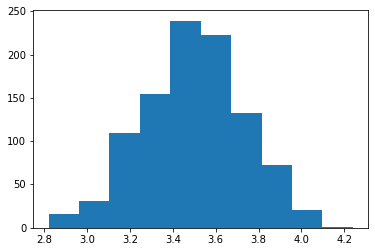

In [6]:
# demonstration of the central limit theorem
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
# seed the random number generator
seed(1)
# calculate the mean of 50 dice rolls 1000 times
means = [mean(randint(1, 7, 50)) for _ in range(1000)]
# plot the distribution of sample means
pyplot.hist(means)
pyplot.show()

### 3) Hypothesis Testing - Statistical Hypothesis Testing
Overview:
- 2 main types of tests we use alot in ML:
    - A test that assumes that data has a normal distribution
    - A test that assumes that 2 samples were drawn from the same underlying population distribution

Key Points:
- xx



**Statistical Test Interpretation**

We reject the null hypothesis that the samples have the same mean at a chosen level of statistical significance (or confidence). A statistical hypothesis test may return a value called p or the p-value. This is a quantity that we can use to interpret or quantify the result of the test and either reject or fail to reject the null hypothesis. This is done by comparing the p-value to a threshold value chosen beforehand called the significance level.

The significance level is often referred to by the Greek lower case letter alpha. A common value used for alpha is 5% or 0.05. A smaller alpha value suggests a more robust interpretation of the result, such as 1% or 0.01%. The p-value is compared to the pre-chosen alpha value. A result is statistically significant when the p-value is less than or equal to alpha. This signifies a
change was detected: that the default or null hypothesis can be rejected.

p-value <= alpha: significant result, reject null hypothesis (H1).

p-value >= alpha: not significant result, fail to reject the null hypothesis (H0).

The significance level can be inverted by subtracting it from 1 to give a confidence level of the hypothesis given the observed sample data.

confidence level = 1 - significance level




#### Common p-value misinterpretations:

**True or False Null Hypothesis**

The interpretation of the p-value does not mean that the null hypothesis is true or false. It does mean that we have chosen to reject or fail to reject the null hypothesis at a specific statistical significance level based on empirical evidence and the chosen statistical test. You are limited to making probabilistic claims, not crisp binary or true/false claims about the result.

**p-value as Probability**

A common misunderstanding is that the p-value is a probability of the null hypothesis being true or false given the data. In probability, this would be written as follows:

Pr(hypothesis|data)

This is incorrect. Instead, the p-value can be thought of as the probability of the data given the pre-specified assumption embedded in the statistical test. Again, using probability notation, this would be written as:

Pr(data|hypothesis)

It allows us to reason about whether or not the data fits the hypothesis. Not the other way around. The p-value is a measure of how likely the data sample would be observed if the null hypothesis were true.

#### Interpreting Critical Values

Some tests do not return a p-value. Instead, they might return a test statistic value from a specific data distribution that can be interpreted in the context of critical values. A critical value is a value from the distribution of the test statistic after which point the result is significant and the null hypothesis can be rejected.

Test Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0).

Test Statistic >= Critical Value: significant result, reject null hypothesis (H1).

#### Degrees of freedom in Statistics

The degrees of freedom is the number of independent pieces of information that are used to estimate a parameter or calculate a statistic from the data sample.

### 4) Hypothesis Testing - Statistical Distributions
Overview:
- (to be elaborated)


Key Pointers:
- Density functions (PDF, CDF)
- Gaussian distribution
- Student's t-Distribution
- Chi-Squared Distribution


**Density Functions**

- Probability Density function (PDF): calculates the probability of observing a given value.
- Cumulative Density function (CDF): calculates the probability of an observation equal or less than a value.

**Gaussian Distribution**
- Mean: Greek lower letter mu, expected value of the distribution.
- Variance: Greek lower letter sigma raised to 2nd power (because the units of the variable are squared), describes the spread of observation from the mean.
- Standard Deviation (commonly used): Greek lowercase letter sigma, describes the normalized spread of observations from the mean.


**Other distributions**
- Student's t-Distribution (to be elaborated)
- Chi-Squared Distribution (to be elaborated)

### 5) Hypothesis Testing - Critical Values
Overview:
- Not all implementations of statistical tests return p-values. Sometimes, we have to use critical values.

Key Points:
- Examples of statistical hypothesis tests and their distributions from which critical values can be calculated:
    - Z-Test: Gaussian distribution
    - Student's t-Test: Student's t-Distribution
    - Chi-Squared Test: Chi-Squared distribution
    - ANOVA: F-Distribution
- Calculated critical values are used as a threshold for interpreting the result of a statistical test. Observation values in the population beyond the critical value are often called the *critical region* or the *region of rejection*.



**One-Tailed Test**

- Test Statistic <= Critical Value: not significant result, fail to reject null hypothesis (H0).
- Test Statistic > Critical Value: significant result, reject null hypothesis (H0).

**Two-Tailed Test**

- Lower CR <= Test Statistic >= Upper CR: not significant result, fail to reject null hypothesis (H0).
- Test Statistic < Lower CR OR Test Statistic > Upper CR: significant result, reject null hypothesis (H0).

**Percent Point Function (PPF):**
- Returns the observation value for the provided probability that is less than or equal to the provided probability from the distribution.

**Gaussian Critical Values**
- The below example calculates the percent point function for 95% on the standard Gaussian distribution. It prints the value that marks 95% or less of the observations from the distribution of about 1.65.

In [7]:
# gaussian percent point function
from scipy.stats import norm
# define probability
p = 0.95
# retrieve value <= probability
value = norm.ppf(p)
print(value)
# confirm with cdf
p = norm.cdf(value)
print(p)

1.6448536269514722
0.95


**Student's t Critical Values**
- The below example calculates the PPF for 95% on the standard Student's t-distribution with 10 degrees of freedom. It returns the value of 1.812 or less that covers 95% of observations from the chosen distribution.

In [8]:
# student t-distribution percent point function
from scipy.stats import t
# define probability
p = 0.95
df = 10
# retrieve value <= probability
value = t.ppf(p, df)
print(value)
# confirm with cdf
p = t.cdf(value, df)
print(p)

1.8124611228107335
0.949999999999923


**Chi-Squared Critical Values**
- The below example calculates the PPF for 95% on the standard Chi-Squared distribution with 10 degrees of freedom. It returns the value of 18.3 or less that covers 95% of observations from the chosen distribution.

In [9]:
# chi-squared percent point function
from scipy.stats import chi2
# define probability
p = 0.95
df = 10
# retrieve value <= probability
value = chi2.ppf(p, df)
print(value)
# confirm with cdf
p = chi2.cdf(value, df)
print(p)

18.307038053275146
0.95


### 6) Hypothesis Testing - Covariance and Correlation
Overview:
- Correlation is the statistical summary of the r/s between variables. Identifying such complex and unknown r/s between the variables in our dataset can help us better prepare our data to meet the expectations of ML algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.

Key Pointers:
- Correlation can be: Positive/ Neutral/ Negative.
- 2 or more variables being tightly related is known as multi-collinearity. This may negatively affect performance of some ML algorithms. 







**Covariance**
- A covariance value of 0 indicates that both variables are completely independent. The cov() NumPy function can be used to calculate a covariance matrix between 2 or more variables.

In the below example, we can see that the covariance between the 2 variables is 389.75. We can see that it is positive, suggesting the variables change int he same direction.

In [10]:
# calculate the covariance between two variables
from numpy.random import randn
from numpy.random import seed
from numpy import cov
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate covariance matrix
covariance = cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


**Pearson's Correlation**
- Pearson's correlation coeficient is calcualted as the covariance of the 2 variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the 2 variables to give an interpretable score.
- The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. 0 means no correlation.
- The pearsonr() SciPy function can be used to calculate the Pearson's correlation coefficient between 2 data samples with the same length.

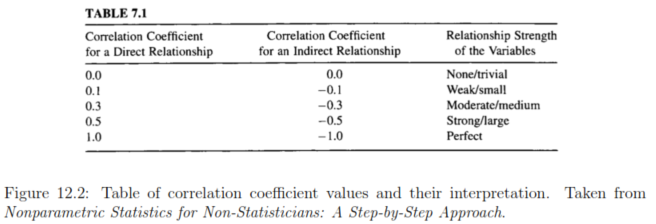

The Pearson's correlation is a statistical hypothesis test that does assume that there is no relationship between the samples (null hypothesis). The p-value can be interpreted as follows:

- p-value <= alpha: significant result, reject null hypothesis, some relationship (H1).
- p-value > alpha: not significant result, fail to reject null hypothesis, no relationship (H0).

In the example below, we can see that the value is 0.888 which indicates a high level of positive correlation.

In [17]:
# calculate the pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, p = pearsonr(data1, data2)
# display the correlation
print('Pearsons correlation: %.3f' % corr)
# interpret the significance
alpha = 0.05
print(f'Value of p is: {p}')
if p > alpha:
    print('No correlation (fail to reject H0)')
else:
    print('Some correlation (reject H0)')

Pearsons correlation: 0.888
Value of p is: 0.0
Some correlation (reject H0)


### 7) Hypothesis Testing - Significance Tests
Overview:
- Parametric statistical methods often mean those methods that assume the data samples have a Gaussian distribution.

Key Pointers:
- Student's t-Test
- Paired Student's t-Test
- Analysis of Variance Test
- Repeated measures ANOVA Test

Parametric statistical significance tests are those statistical methods that assume data comes from the **same** Gaussian distribution, that is a data distribution with the same mean and standard deviation: the parameters of the distribution.

The p-value can be thought of as the
probability of observing the two data samples given the base assumption (null hypothesis) that
the two samples were drawn from a population with the same distribution. The p-value can be
interpreted in the context of a chosen significance level called alpha. A common value for alpha
is 5%, or 0.05. If the p-value is below the significance level, then the test says there is enough
evidence to reject the null hypothesis and that the samples were likely drawn from populations
with differing distributions.

- p-value <= alpha: significant result, reject null hypothesis (H0), distributions differ.
- p-value > alpha: not significant result, fail to reject null hypothesis (H0), distributions same.

**Student's t-Test**

Student's t-test is a hypothesis test that 2 independent data samplse known to have  Gaussian distribution have the same Gaussian distribution.

The assumption/ null hypothesis is that means of 2 populations are equal. A rejection of this hypothesis indicates that there is sufficient evidence that the means of the populations are different, and in turn that the distributions are not equal.

We can use the ttest_ind() SciPy function. It returns the calculated statistic and p-value.

In the example below, we see that the sample means are difference, with a significance of at least 5%.

In [1]:
# student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.262, p=0.025
Different distributions (reject H0)


**Paired Student's t-Test**

Data samples that are repeated or dependent (of the same object) are referred to as paired samples or repeated measures. As they are not independent, we cannot use the Student's t-test.

The rejection of the null hypothesis indicates that there is enough evidence that the sample means are different.

We can use the ttest_rel() SciPy function. It calculates the statistic and p-value.

The below example shows that the samples have different means and therefore different distributions.

In [2]:
# paired student's t-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_rel
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.372, p=0.020
Different distributions (reject H0)


**Analysis of Variance Test (ANOVA)**

Sometimeswe have situations with multiple independent data samples. The ANOVA test assumes that the mean across 2 or more groups are equal (H0). If it is rejected, then at least 1 data sample has a different distribution.

Importantly, the test only comments on whether all samples are the same or not; it cannot quantify which samples differ or by how much.

We can use the f_oneway() SciPy function. It returns the test statistic and the p-value.

The below example shows that 1 or more of the samples means differ.

In [3]:
# analysis of variance test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = f_oneway(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=3.655, p=0.027
Different distributions (reject H0)


### 8) Hypothesis Testing - Effect Size

Overview:
- Effect size methods quantify the size of an effect in the results of experiments that can be used to complement the results from statistical hypothesis tests. Statistical tests help to comment on the likelihood that there is an effect, but does not quantify, or comment on the size of the effect.
- "It is possible (and unfortunately quite common) for a result to be statistically significant and trivial. It is also possible for a result to be statistically nonsignificant and important."
- Effect size complements the test results of a statistical hypothesis test. Ideally, both results should be presented side-by-side.
    - Hypothesis Test: Quantify likelihood of observing the data given an assumption (null hypothesis).
    - Effect Size: Quantify the size of the effect assuming that the effect is present.

Key Points:
- 2 main groups of methods for calculating effect size:
    - Association: (eg. correlation)
    - Difference: (eg. difference between means)
        - *Note*: 2 other popular methods for quantifying the difference effect size are:
            - Odds Ratio: Measures the odds of an outcome ocurring from 1 treatment compared to another.
            - Relative Risk Ratio: Measures the probabilities of an outcome occurring from 1 treatment compared to another.

**Calculate Association Effect Size**

Association between variables is often referred to as the r family of effect size methods. Most common method for calculating effect size is called Pearson's correlation coefficient. AKA Pearson's r. It measures degree of linear association between 2 real-valued variables. It is a unit-free effect size measure.

- -1.0: Perfect negative relationship
- ...
- 0.0: No relationship
- ...
- 1.0: Perfect positive relationship

The below example shows a strong positive relationship between the 2 samples.

In [4]:
# calculate the pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 10 * randn(10000) + 50
data2 = data1 + (10 * randn(10000) + 50)
# calculate pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.712


**Calculate Difference Effect Size**

Difference between groups is often referred to as d family of effect size methods. The most common method for calculating the difference between mean value of groups is called Cohen's d. It is a standard score that summarizes the difference in terms of number of standard deviations.

- Small effect size: d = 0.20
- Medium effect size: d = 0.50
- Large effect size: d = 0.80

In the example below, it calculates and prints the Cohen's d effect size. As per the data created, the difference between the means is 1 half of 1 standard deviation interpreted as a medium effect size.

In [5]:
# calculate the cohen's d between two samples
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt

# function to calculate cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

# seed random number generator
seed(1)
# prepare data
data1 = 10 * randn(10000) + 60
data2 = 10 * randn(10000) + 55
# calculate cohen's d
d = cohend(data1, data2)
print('Cohens d: %.3f' % d)

Cohens d: 0.500


### 9) Hypothesis Testing - Statistical Power

Overview:
- Statistical power is the probability that the test correctly rejects the null hypothesis, it is the probability of a true positive result. (It is only useful when the null hypothesis is rejected.)
- A minimum level of statistical power must be sought to allow us to lead to valid conclusions about the meaning of the experiment results.
- 4 parts:
    - Effect size
    - Sample size
    - Significance
    - Statistical power (probability of accepting the alternative hypothesis if it is true)

Key pointers:
- Statistical power is the probability of a hypothesis test of finding an effect if there is an effect to be found.
- A power analysis can be used to estimate the minimum sample size required for an experiment, given a desired significance level, effect size, and statistical power.
- How to calcualte and plot power analysis for the Student's t-Test in Python in order to effectively design an experiment


**Power Analysis (TTestIndPower() from Statsmodels library)**

We can use the TTestIndPower() function from the Statsmodel library.

In the example below, we provide our expectation of effect, alpha (significance level), and statistical power. We then calculate the estimated/ suggested minimum number of samples for the experiment as 25, which allows us to see an effect of the desired size.

In [6]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


**Power Curves (plot_power() from Statsmodels library)**

Power curves are line plots that show how the change in variables, such as effect size and sample size, impact the power of the statistical test.

The plot_power() function can be used to create power curves.

In the example below, we create a plot showing the impact on statistical power (y-axis) for 3 different effect sizes (es) as the sample size (x-axis) is increased. We can see that if we are interested in a large effect that a point of diminishing returns in terms of statistical power occurs at around 40-to-50 observations.

*Note*: Statsmodels also has classes to pwerform a power analysis with other statistical tests, such as F-test, Z-test, and Chi-Squared test.

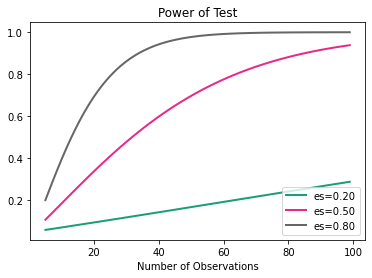

In [7]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

## 10) Resampling Methods - Estimation with Cross-Validation

Overview:
- Cross-validation is a statistical method/ resampling method to estimate the skill of ML models. It is easy to understand, implement, and results in skill estimates that generally have a lower bias than other methods.

Key pointers:
- Cross validation worked example
- Variations on Cross-Validation

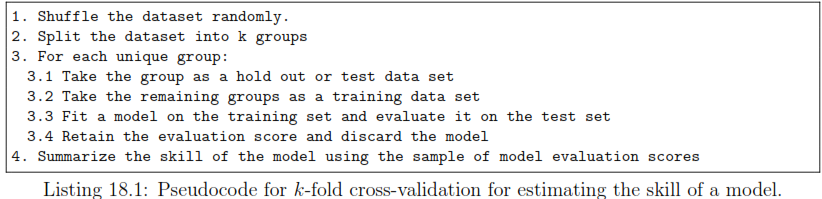

**Note 1**: It is important that any preparation of the data prior to fitting the model occur on the cross-validation assigned training dataset within the loop rather than on the broader data set. This also applies to any tuning of hyperparameters. A failure to perform these operations within the loop may result in data leakage and an optimistic estimate of the model skill.

**Note 2**: Results of k-fold cross-validation run are often summarized with the mean of the model skill scores. It is also good practice to include a measure of the variance of the skill scores, such as the standard deviation or standard error.

**Note 3**: A value of k = 10 is very common in the field of applied ML, and is recommended if struggling to choose a value for the dataset.

**Note 4**: There is a bias-variance trade-pff associated with the choice of k in k-fold cross-validation. Given these considerations, using values of k = 5 or 10 have been shown empirically to yield test error rate estimates that suffer neither from execessively high bias nor from very high variance.

- **Train/Test Split**: Taken to one extreme, k may be set to 1 such that a single train/test split is created to evaluate the model.

- **LOOCV**: Taken to another extreme, k may be set to the total number of observations in the dataset such that each observation is given a chance to be the held out of the dataset. This is called leave-one-out cross-validation, or LOOCV for short.

- **Stratified**: The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation.

- **Repeated**: This is where the k-fold cross-validation procedure is repeated n times, where importantly, the data sample is shuffled prior to each repetition, which results in a different split of the sample.

In [8]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


## 11) Estimation Statistics - Introduction to Estimation Statistics

Overview:
- Estimation statistics help to quantify the magnitude of effects and the amount of uncertainty for estimated values. They are an alternate or complement to statistical hypothesis testing.

Key points:
- Estimation statistics
- Effect size
- Interval estimation
- Meta-Analysis

**Estimation Statistics**:
- Effect size: methods for quantifying the size of an effect given a treatment or intervention
- Interval estimation: methods for quantifying the amount of uncertainty in a value
- Meta-Analysis: methods for quantifying the findings across multiple similar studies


- Statistical Hypothesis Tests: Dichotomous null hypothesis statistical tests question; "Is there an effect?"
- Estimation statistics: Describe the size and confidence of the difference; "How much..? To what extent..?"

**Effect Size**
- Association: Degree to which 2 samples change together.
- Difference: Degree to which 2 samples are different.

**Interval Estimation**
- Quantifies the uncertainty for an observation.
- Intervals transform a point estimate into a range that provides more information about the estimate, such as its precision, making them easier to compare and interpret.

3 main types of intervals that are commonly calculated:
- Tolerance interval: Bounds or coverage of a proportion of a distribution with a specific level of confidence
- Confidence interval: Bounds on the estimate of a population parameter (eg. interpret range for a mean of a data sample that can be more precise as sample size is increased)
- Prediction interval: Bounds on a single observation (eg. presenting the mean estimated skill of a model, a CI can be used to provide bounds on the precision of the estimate)

**Meta-Analysis**

Refers to use of weighting of multiple similar studies in order to quantify a broader cross-study effect. Useful when many small and similar studies have been performed with noisy and conflicting findings.

### 12) Estimation Statistics - Tolerance Intervals

Overview:
- Tolerance intervals (a bound on observations from a population) help to set upper and lower bounds on data that can help to identify anomalies and set expectations for what to expect.
- Requires both a coverage proportion and confidence to be specified.
- Tolerance intervals for a data sample with a Gaussian distribution can be easily calculated.

Key pointers:
- Statistical tolerance intervals:
- How to calculate tolerance intervals:
- Tolerance intervals for Gaussian distribution

**Statistical Tolerance Intervals**

Example: *"The range from x to y covers 95% of the data with a confidence of 99%."*

- **Coverage**: The proportion of the population covered by the interval.
- **Confidence**: The probabilistic confidence that the interval covers the proportion of the population.

*Note*: The tolerance coefficient is the degree of confidence with which the interval reaches the specified coverage.

**How to calculate Tolerance Intervals**

The size of a tolerance interval is proportional to the size of the data sample from the population and the variance of the population.

2 main methods for calculating tolerance intervals:
- Parametric Tolerance Interval: Often used to refer to a Gaussian distribution.
- Nonparametric Tolerance Interval: Use rank statistics to estimate coverage and confidence. Often results in less precision due to lack of information about the distribution.

In [9]:
# parametric tolerance interval
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
# seed the random number generator
seed(1)
# generate dataset
data = 5 * randn(100) + 50
# specify degrees of freedom
n = len(data)
dof = n - 1
# specify data coverage
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.ppf(prop_inv)
print('Gaussian critical value: %.3f (coverage=%d%%)' % (gauss_critical, prop*100))
# specify confidence
prob = 0.99
prop_inv = 1.0 - prob
chi_critical = chi2.ppf(prop_inv, dof)
print('Chi-Squared critical value: %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob*100, dof))
# tolerance
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
print('Tolerance Interval: %.3f' % interval)
# summarize
data_mean = mean(data)
lower, upper = data_mean-interval, data_mean+interval
print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper, prop*100, prob*100))

Gaussian critical value: -1.960 (coverage=95%)
Chi-Squared critical value: 69.230 (prob=99%, dof=99)
Tolerance Interval: 2.355
47.95 to 52.66 covers 95% of data with a confidence of 99%


In another example below, we also show how the tolerance interval becomes smaller (more precise), as the sample size is increased.

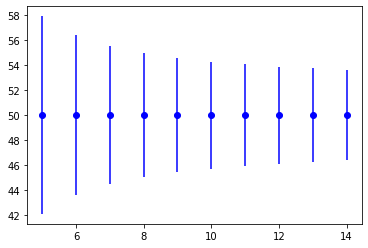

In [10]:
# plot tolerance interval vs sample size
from numpy.random import seed
from numpy.random import randn
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
from matplotlib import pyplot
# seed the random number generator
seed(1)
# sample sizes
sizes = range(5,15)
for n in sizes:
	# generate dataset
	data = 5 * randn(n) + 50
	# calculate degrees of freedom
	dof = n - 1
	# specify data coverage
	prop = 0.95
	prop_inv = (1.0 - prop) / 2.0
	gauss_critical = norm.ppf(prop_inv)
	# specify confidence
	prob = 0.99
	prop_inv = 1.0 - prob
	chi_critical = chi2.ppf(prop_inv, dof)
	# tolerance
	tol = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
	# plot
	pyplot.errorbar(n, 50, yerr=tol, color='blue', fmt='o')
# plot results
pyplot.show()

### 13) Estimation Statistics - Confidence Intervals

Overview:
- In ML, we have to estimate the performance of an algorithm on unseen data. CI allows us to quantify the uncertainty of an estimate, by providing an interval.

Key pointers:
- What is a Confidence Interval?
- Interval for Classification Accuracy
- Nonparametric Confidence Interval

**What is a Confidence Interval?**

CI is a bounds on the estimate of a population variable. It is an interval statistic used to quantify the uncertainty on an estimate. It provides a lower bound, upper bound, and a likelihood. Often, the larger the sample from which the estimate was drawn, the more precise the estimate and the smaller (better) the confidence interval.

Example:
- *"The accuracy of the model was x +/- y at the 95% confidence level."* **or**
- *"Given the sample, there is a 95% likelihood that the range x to y covers the true model accuracy."*

*Note*: CI is different from tolerance interval (describes bounds of data sampled from distribution). CI is also different from prediction interval (describes the bounds on a single observation).


**Interval for Classification Accuracy**

Classification problems typically use classification accuracy or error (the inverse of accuracy) to describe the skill of the classifier model. Each prediction is a binary decision, which is technically a Bernoulli trial, and they follow a binomial distribution. With large sample sizes (eg. more than 30), we can approximate the distribution with a Gaussian.

With this approximation/ assumption of a Gaussian distribution, we can calculate the confidence interval.

However, we should remember that the CI is a likelihood over a range, and the true model skill *may* lie outside of the range.

The function takes the count of successes (or failures), the total number of trials, and the significance level as arguments and returns the lower and upper bound of the confidence interval. The example below demonstrates this function in a hypothetical case where a model made 88 correct predictions out of a dataset with 100 instances and we are interested in the 95% confidence interval (provided to the function as a significance of 0.05).

In [11]:
# calculate the confidence interval
from statsmodels.stats.proportion import proportion_confint
# calculate the interval
lower, upper = proportion_confint(88, 100, 0.05)
print('lower=%.3f, upper=%.3f' % (lower, upper))

lower=0.816, upper=0.944


**Nonparametric Confidence Interval**

Often, we do not know the distribution for a chosen performance measure.

"The assumptions that underlie parametric confidence intervals are often violated. The predicted variable sometimes isn't normally distributed, and even when it is, the variance of the normal distribution might not be equal at all levels of the predictor variable."

For such cases, the bootstrap resampling method can be used as a nonparametric method for calculating CI, nominally called boostrap CIs.

The bootstrap is a simulated Monte Carlo method where samples are drawn from a fixed finite dataset with replacement and a parameter is estimated on each sample. This procedure leads to a robust estimate of the true population parameter via sampling. 

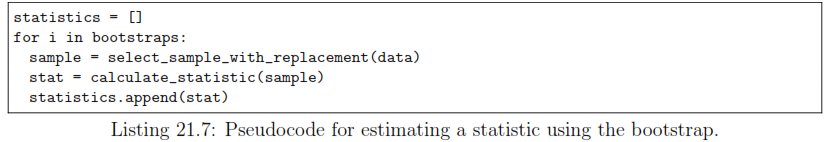

In the example below, it summarizes the distribution of bootstrap sample statistics including the 2.5th, 50th (median), and 97.5th percentile.

We can make such a claim about the sample distribution:
- "There is a 95% likelihood that the range 0.741 to 0.757 covers the true statistic median."

In [12]:
# bootstrap confidence intervals
from numpy.random import seed
from numpy.random import rand
from numpy.random import randint
from numpy import mean
from numpy import median
from numpy import percentile
# seed the random number generator
seed(1)
# generate dataset
dataset = 0.5 + rand(1000) * 0.5
# bootstrap
scores = list()
for _ in range(100):
	# bootstrap sample
	indices = randint(0, 1000, 1000)
	sample = dataset[indices]
	# calculate and store statistic
	statistic = mean(sample)
	scores.append(statistic)
print('50th percentile (median) = %.3f' % median(scores))
# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
# retrieve observation at lower percentile
lower = max(0.0, percentile(scores, lower_p))
print('%.1fth percentile = %.3f' % (lower_p, lower))
# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha) + (alpha / 2.0)
# retrieve observation at upper percentile
upper = min(1.0, percentile(scores, upper_p))
print('%.1fth percentile = %.3f' % (upper_p, upper))

50th percentile (median) = 0.750
2.5th percentile = 0.741
97.5th percentile = 0.757


### 14) Estimation Statistics - Prediction Intervals

Overview:
- Prediction intervals seek to quantify the uncertainty for a single specific outcome/ single point prediction.

Key pointers:
- What is a prediction interval?
- How to calculate a prediction interval?
- Prediction interval for linear regression

**What is a prediction interval?**

Prediction interval provides a probabilistic upper and lower bounds on the estimate of an outcome variable.

They are most commonly used when making predictions/ forecasts witha regression model, where a quantity is being predicted.

Example: "Given a prediction of 'y' given 'x', there is a 95% likelihood that the range 'a' to 'b' covers the true outcome."

*Note*:
- In predictive modelling, a CI can be used to quantify the uncertainty of the estimated skill of a model, whereas a prediction interval can be used to quantify the uncertainty of a single forecast. 

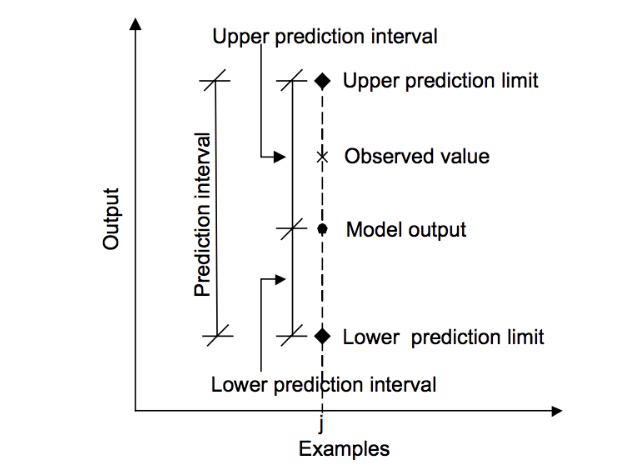

**How to calculate a prediction interval?**

A prediction interval is calculated as some combination of the estimated variance of the model and the variance of the outcome variable. It is easy to describe, but difficult to calculate in practice.

For simple cases like linear regression, we can estimate the prediction interval directly.

For nonlinear ML models, we can use the following methods:
- Delta Method, from field of nonlinear regresssion
- Bayesian Method, from Bayesian modeling and statistics
- Mean-Variance Estimation Method, using estimated statistics
- Bootstrap Method, using data resampling and developing an ensemble of models

**Prediction interval for linear regression**

In the below example, we use a 2 variable dataset, where the output variable (y) depends on the input variable (x) with some Gaussian noise.

Overview of steps:
- We create a dataset
- We Fit a linear regression model
- We use the significance level of 95%, which corresponds to 1.69 standard deviations from the Gaussian distribution.
- After calculating the interval, we summarize the bounds on the prediction to the user

We can see in this case, that the 95% prediction interval does cover the true expected value. The raw dataset is visualized as a scatter plot, the predictions as a red line, the prediction and prediction interval as a black dot and line respectively.

Prediction Interval: 20.204
95% likelihood that the true value is between 160.750 and 201.159
True value: 183.124


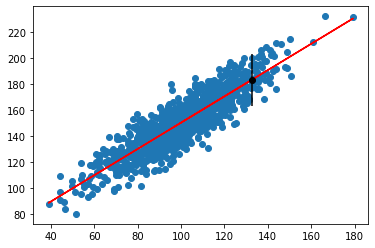

In [13]:
# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import sqrt
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)
# make predictions
yhat = b0 + b1 * x
# define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# estimate stdev of yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = y_out - interval, y_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % yhat_out)
# plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()

### 15) Nonparametric Methods - Normality Tests

Overview:
- It is important to decide whether to use parametric or nonparametric statistical methods.
- Parametric statistical methods: Assumes data has a known and specific distribution, often a Gaussian.
- Nonparameteric statistical methods: If data sample is not known, assumptions of parametric statistical tests are violated and nonparametric methods must be used.
- Using Normality tests allows us to check if a data sample deviates from the normal distribution.

Key pointers:
- Normality Assumption
- Visual Normality Checks
- Statistical Normality Tests
    - Shapiro-Wilk Test
    - D'Agostino's K2 Test
    - Anderson-Darling Test
- What test to use?

**Normality Assumption**

A large fraction of the field of statistics is concerned with data that assumes it was drawn from a Gaussian distribution. If our methods used assume a Gaussian distribution and the datawas drawn from a different distribution, the findings may be misleading or plain wrong.

There is also some middle ground to assume that data is "Gaussian-enough" to use parametric methods or to use data preparation techniques to transform data to be sufficiently Gaussian to use parametric methods. 

There are 3 main areas where you may need to make this evaluation of a data sample in a ML project:
- Input data to the model int he case of fitting models
- Model evaluation results in the case of model selection
- Residual errors from model predictions in the case of regression

**Visual Normality Checks**

Visual plots of the data function as qualitative checks for a Gaussian distribution. They are less accurate than statistical methods, but they are fast.

- Histograms
- Quantile-Quantile (QQ) plots

Using the hist() Matplotlib function, we can see a Gaussian-like shape to the example data. This provides a rough approximation to the familiar bell-shape.

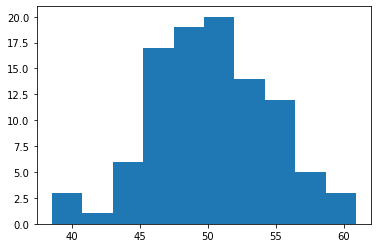

In [1]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(data)
pyplot.show()

QQ plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (eg. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match is shown by a line of dots on a 45-degree angle from the bottom left to the top right of the plot. Deviations by the dots from the line shows a deviation from the expected distribution.

We use the qqplot() Statsmodels function.

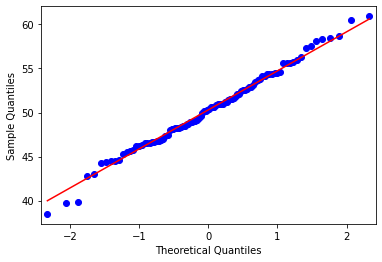

In [3]:
# q-q plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s') # the 's' value refers to the standardized line
pyplot.show()

**Statistical Normality Tests**

When applying the statistical tests, we need to know how to interpret the results. Each test returns at least 2 things:
- Statistic: Quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.
- p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

*Note*: While the statistic can aid in the interpretation of the result, they are more complex to use. Instead, p-values can be used to quickly and accurately interpret the statistic in practical applications.

The tests assume that the sample was drawn from a Gaussian distribution. This assumption is shown in the null hypothesis.
- If p-value <= alpha: significant result, reject null hypothesis, not Gaussian (H1).
- If p-value > alpha: not significant result, fail to reject null hypothesis, Gaussian (H0).


**Shapiro-Wilk Test**

The shapiro() SciPy function returns both the W-statistic calculated by the test and the p-value.

In the example below, the p-value is interpreted and finds that the data is likely drawn from a Gaussian distribution.

In [4]:
# example of the shapiro-wilk test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


**D'Agostino's K2 Test**

This test calculates summary statistics, namely kurtosis and skewness to determine if the data distribution departs from the normal distribution.

- Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
- Kurtosis quantifies how much of the distribution is in the tail.

The K2 test is available via the normaltest() SciPy function.

The below example is interpreted against an alpha of 5% and finds that the test dataset does not significantly deviate from normal.

In [5]:
# example of the d'agostino and pearson's test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


**Anderson-Darling Test**

This test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

The AD test returns a list of critical values rather than a single p-value, which can provide the basis for a more thorough interpretation of the result.

The AD test is available via the anderson() SciPy function.

Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 is failed to be rejected if the calculated statistic is less than the critical value. This test returns a critical value for a range of different commonly used significance levels. We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.

In the example below, we can see that at each significance level, the test has found that the data follows a normal distribution.

In [6]:
# example of the anderson-darling test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


**What test to use?**

It is recommended to use all the test on the data, where appropriate. There are 2 ways to make a decision/ interpret the results:

- Hard Fail
    - Each test looks the normality of the data distribution from a slightly different perspective. Here, if any 1 test fails, that means the data is not normal. We can go on to investigate why our data is not normal, and perhaps use data preparation techniques to make the data more normal. Or, we can start looking into the use of nonparametric statistical methods instead of the parametric methods.
    
- Soft Fail
    - If some methods suggest the sample is Gaussian and some not, then we may take this indicationn that the data is Gaussian-like. In many situations, we can treat the data as though it is Gaussian, and proceed with our chosen parametric statistical methods.

### 16) Nonparametric Methods - 5 number summary

Overview:
- Mean and standard deviation are used to summarize data with a Gaussian distribution, but may not be meaningful, or even misleading if the data sample has a non-Gaussian distribution. The 5 number summary describes the distribution of a data sample without assuming a specific data distribution.

Key pointers:
- 5 number summary
- How to calculate the 5 number summary

**5 Number Summary**

5 Number Summary is a nonparametric data summarization technique. It is sometimes called the Tukey 5 number summary. It can be used to describe the distribution of data samplse for data with any distribution.

1. Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
2. 1st Quartile: 25th percentile
3. 3rd Quartile: 75th percentile
4. Minimum: Smallest observation in the sample
5. Maximum: Largest observation in the sample

A quartile is an observed value at a point that aids in splitting the ordered data sample into 4 equally sized parts.

A percentile is an observed value at a point that aids in splitting the ordered data sample into 100 equally sized portions. Quartiles are often also expressed as percentiles.

Both quartile and percentile values are examples of rank statistics that can be calculated on a data sample with any distribution. They are used to quickly summarize how much of the data in the distribution is behind or in front of a given observed value. Quartiles are also calculated in the box and whisker plot, a nonparametric method to graphically summarize the distribution of a data sample.

**How to calculate the 5 number summary**

We use the percentile() NumPy function to calculate the 1st, 2nd (median) and 3rd quartile values. The function takes both an array of observations and a floating point value to specify the percentile to calculate in the range of 0 to 100.

By default, the function will calculate a linear interpolation (average) between observations if needed, such as in the case of calculating the median on a sample with an even number of values.

The NumPy functions min() and max() can be used to return the smallest and largest values in the data sample.

In the below example, we generate a data sample drawn from a uniform distribution between 0 and 1 and summarize it using the 5 number summary.

In [7]:
# calculate a 5-number summary
from numpy import percentile
from numpy.random import seed
from numpy.random import rand
# seed random number generator
seed(1)
# generate data sample
data = rand(1000)
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# display 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.000
Q1: 0.252
Median: 0.508
Q3: 0.751
Max: 0.997


### 17) Nonparametric Methods - Independence Test

Overview:
- A common problem in applied ML is determining whether input features are relevant to the outcome to be predicted. This is the problem of feature selection.
- For classification problems where input variables are also categorical, we can use statistical tests to determine whether the output variable is dependent or independent of the input variables. If independent, that input variable is a candidate for a feature that may be irrelevant to the problem and removed from the dataset.
- We use Pearson's Chi-Squared statistical hypothesis to quantify the independence of pairs of categorical variables.

Key pointers:
- Pearson's Chi-Squared test

**Pearson's Chi-Squared Test**

It is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable.

We can calculate the expected frequency of observations in each group (a variable, eg. 'Interest', or 'Sport'), and see whether the partitioning of that variable by another (eg. 'Gender') results in similar or different frequencies.

The variables are considered independent if the observed and expected frequencies are similar, that the levels of the variables do not interact, are not dependent.

Interpretation of test statistic for Chi-Squared distribution:
- Test statistic >= Critical Value: significant result, reject null hypothesis, dependent (H1).
- Test statistic < Critical Value: not significant result, fail to reject null hypothesis, independent (H0).

We can also interpret the p-value against a chosen significance level (alpha):
- p-value <= alpha: significant result, reject null hypothesis (H1).
- p-value > alpha: not significant result, fail to reject null hypothesis, independent (H0).

We can use the chi2_contingency() SciPy function.

In [8]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [	[10, 20, 30],
			[6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)
